<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Naive-Bayes" data-toc-modified-id="Naive-Bayes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Naive Bayes</a></span></li><li><span><a href="#SVC" data-toc-modified-id="SVC-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>SVC</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Ada-Boost" data-toc-modified-id="Ada-Boost-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Ada Boost</a></span><ul class="toc-item"><li><span><a href="#Evaluate-Misclassified-Sentences" data-toc-modified-id="Evaluate-Misclassified-Sentences-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Evaluate Misclassified Sentences</a></span></li></ul></li><li><span><a href="#Sentiment-Analysis" data-toc-modified-id="Sentiment-Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Sentiment Analysis</a></span><ul class="toc-item"><li><span><a href="#Using-TF-IDF-and-Classifiers" data-toc-modified-id="Using-TF-IDF-and-Classifiers-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Using TF-IDF and Classifiers</a></span></li></ul></li></ul></div>

# Cleaning Bootlegged Data and Testing Classifier Algorithms

In [4]:
import spacy
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
nlp = spacy.load("en_core_web_sm")

import gensim
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Import CountVectorizer and TFIDFVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [5]:
train1 = pd.read_csv('../prepped_data/train_2000_3000_210425.csv')
train2 = pd.read_csv('../prepped_data/train_3000_4000_210425.csv')
train3 = pd.read_csv('../prepped_data/train_5000_6000_210425.csv')
train4 = pd.read_csv('../prepped_data/train_0_1000_210425.csv')

In [6]:
def df_study(df):
    display(df.shape)
    display(df.columns)
    display(df.dtypes)
    display(df.head(10))
    
def contains_mthen_2_words(s):
    return len(str(s).split()) > 2

def remove_short_and_empty_sents(df):
    df.drop(index=df.loc[df['sent_text'] == ' ',:].index, inplace=True)
    df['to_drop'] = df['sent_text'].apply(lambda x: contains_mthen_2_words(x))
    df.drop(index=df.loc[df['to_drop'] == False,:].index, inplace=True)
    df.drop(columns=['to_drop'], inplace=True)

In [7]:
df_study(train4)

(1000, 5)

Index(['Unnamed: 0', 'rev_id', 'sent_text', 'category', 'sentiment'], dtype='object')

Unnamed: 0     int64
rev_id         int64
sent_text     object
category      object
sentiment      int64
dtype: object

,Unnamed: 0,rev_id,sent_text,category,sentiment
0,0,691636950,We splurged on our last night in Singapore to ...,NaN,0
1,1,691636950,It's a beautiful building & linked to the Gard...,other,1
2,2,691636950,However it is very impersonal & very expensive...,service,-1
3,3,691636950,The room was huge (probably too big) and the s...,room,1
4,4,691636950,The furnishings re lovely & it does feel luxur...,room,1
5,5,691636950,We spent all day by the pool (1pm - 8pm) and e...,pool,1
6,6,691636950,But it is so busy and getting pool service was...,service,-1
7,7,691636950,My son then fell ill at 3am throwing up & diar...,NaN,-1
8,8,691636950,I put it down to being in,NaN,0
9,9,691610644,Located opposite of one iconic building in Sin...,NaN,0


In [8]:
train4.rename(columns={"Unnamed: 3": "category", "Unnamed: 0": "sent_id"}, inplace=True)

In [9]:
train4.set_index('sent_id', inplace=True)

In [10]:
df_study(train1)

(1000, 5)

Index(['Unnamed: 0', 'rev_id', 'sent_text', 'category', 'sentiment'], dtype='object')

Unnamed: 0      int64
rev_id          int64
sent_text      object
category       object
sentiment     float64
dtype: object

,Unnamed: 0,rev_id,sent_text,category,sentiment
0,2000,673847825,I was able to have a swim and take the photo b...,pool,-1.0
1,2001,673847825,The lobby was super busy and I found that a li...,others,-1.0
2,2002,673847825,"But once I got to my room, it was very peaceful.",room,1.0
3,2003,673847825,I'm glad I stayed here but not sure that I wou...,NaN,1.0
4,2004,673838523,"The hotel is amazingly stunning, from when you...",NaN,1.0
5,2005,673838523,This is a must stay even for most one night to...,pool,1.0
6,2006,673838523,We had a view of the gardens by the bay and wh...,other,1.0
7,2007,673600522,Marina Bay Sands totally is the best part of S...,other,1.0
8,2008,673600522,"The hotel the science museum , garden by the b...",other,0.0
9,2009,673600522,I think if you want to visit Singapore you sho...,NaN,1.0


In [11]:
train1.rename(columns={"Unnamed: 3": "category", "Unnamed: 0": "sent_id"}, inplace=True)

In [12]:
train1.set_index('sent_id', inplace=True)

In [13]:
df_study(train2)

(889, 5)

Index(['Unnamed: 0', 'rev_id', 'sent_text', 'category', 'sentiment'], dtype='object')

Unnamed: 0     int64
rev_id         int64
sent_text     object
category      object
sentiment      int64
dtype: object

,Unnamed: 0,rev_id,sent_text,category,sentiment
0,3000,668105871,The view was breathtaking.,room,1
1,3001,668105871,Spagoo breakfast was delicious.,food,1
2,3003,668105871,The room is so spacious with complete premium ...,room,1
3,3004,668066471,As seasoned travellers we have visited many ho...,NaN,1
4,3005,668066471,On arrival our hotel voucher was checked and w...,service,0
5,3006,668066471,We stayed on the 7th floor which you would thi...,room,0
6,3007,668066471,The rooms are amazing - automatic opening of t...,room,1
7,3008,668066471,Lifts were efficient (only to be expected) and...,others,1
8,3009,668066471,Needing your room card - one for,NaN,0
9,3010,668025280,One of the best hotel in the world is Marina b...,food,1


In [14]:
train2.rename(columns={"Unnamed: 0": "sent_id"}, inplace=True)
train2.set_index('sent_id', inplace=True)

In [17]:
df_study(train3)

(843, 5)

Index(['Unnamed: 0', 'rev_id', 'sent_text', 'category', 'sentiment'], dtype='object')

Unnamed: 0     int64
rev_id         int64
sent_text     object
category      object
sentiment      int64
dtype: object

,Unnamed: 0,rev_id,sent_text,category,sentiment
0,5000,655152325,"Received exactly what we booked, good sized ro...",room,1
1,5001,655152325,Bed is rock hard.,room,-1
2,5002,655152325,"Pillows are very good, but the bed kills your ...",room,-1
3,5003,655152325,"You are a number only at this hotel, it is a g...",service,-1
4,5004,655152325,We booked to use the club lounge and this was ...,service,1
5,5005,655152325,The club is large but it needs to be as many g...,service,0
6,5006,655152325,"It has no feeling of exclusiveness, once full ...",food,-1
7,5007,655152325,"There are kids everywhere, no control with the...",food,-1
8,5008,655152325,This was at multiple tables.,NaN,0
9,5009,655152325,Evening drinks should be drinks and,food,0


In [18]:
train3.rename(columns={"Unnamed: 0": "sent_id"}, inplace=True)
train3.set_index('sent_id', inplace=True)

In [19]:
remove_short_and_empty_sents(train1)
remove_short_and_empty_sents(train2)
remove_short_and_empty_sents(train3)
remove_short_and_empty_sents(train4)

In [20]:
train4['category'].value_counts()

room       149
service    116
pool       102
food        81
others      74
other        1
Name: category, dtype: int64

In [17]:
train4['category'].replace({'others': 'other'}, inplace=True)

In [18]:
train4['category'].fillna('none', inplace=True)

In [19]:
train1['category'].fillna('none', inplace=True)

In [20]:
train1['category'].value_counts()

none          176
service       149
experience    133
room          120
pool          112
other          78
food           72
others          2
Name: category, dtype: int64

In [21]:
train1['category'].replace({'others': 'other'}, inplace=True)

In [22]:
train2['category'].value_counts()

room        134
service     132
others       97
pool         85
food         81
othes         1
servivce      1
Name: category, dtype: int64

In [23]:
train2['category'].replace({'others': 'other', 'servivce': 'service', 'othes': 'other'}, inplace=True)

In [24]:
train3['category'].value_counts()

room       132
service    122
pool       118
food        86
others      69
             1
other        1
Name: category, dtype: int64

In [25]:
train3['category'].replace({'others': 'other'}, inplace=True)

In [26]:
train2['category'].fillna('none', inplace=True)
train3['category'].fillna('none', inplace=True)

In [27]:
df = pd.concat([train1, train2, train3, train4], ignore_index=True)

In [28]:
df_study(df)

(3395, 4)

Index(['rev_id', 'sent_text', 'category', 'sentiment'], dtype='object')

rev_id         int64
sent_text     object
category      object
sentiment    float64
dtype: object

,rev_id,sent_text,category,sentiment
0,673847825,I was able to have a swim and take the photo b...,pool,-1.0
1,673847825,The lobby was super busy and I found that a li...,other,-1.0
2,673847825,"But once I got to my room, it was very peaceful.",room,1.0
3,673847825,I'm glad I stayed here but not sure that I wou...,NaN,1.0
4,673838523,"The hotel is amazingly stunning, from when you...",NaN,1.0
5,673838523,This is a must stay even for most one night to...,pool,1.0
6,673838523,We had a view of the gardens by the bay and wh...,other,1.0
7,673600522,Marina Bay Sands totally is the best part of S...,other,1.0
8,673600522,"The hotel the science museum , garden by the b...",other,0.0
9,673600522,I think if you want to visit Singapore you sho...,NaN,1.0


In [29]:
# Our lemmatizing and stemmatizing function

import nltk
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import stopwords, wordnet # Import the stopword list
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

def nltk2wn_tag(nltk_tag):
    '''
    Function matches a tokenized word with its tag for more accurate lemmatization.
    Returns word's tag.
    '''
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:                    
        return None

def convert_words(data_text):
    '''
    Function takes a text and either lemmatizes its content.
    Returns a string of tokens if a token is not a stopword.
    '''
    nltk_tagged = pos_tag(tokenizer.tokenize(data_text.lower()))
    wn_tagged = map(lambda x: (x[0], nltk2wn_tag(x[1])), nltk_tagged)
    res_words = []
    for word, tag in wn_tagged:
        if tag is None:                        
            res_words.append(word)
        else:
            res_words.append(lemmatizer.lemmatize(word, tag))
    return " ".join([word for word in res_words if word not in set(stopwords.words('english'))])

In [30]:
df['sent_text_mod'] = df['sent_text'].map(lambda x: convert_words(x)) 

In [31]:
df

,rev_id,sent_text,category,sentiment,sent_text_mod
0,673847825,I was able to have a swim and take the photo b...,pool,-1.0,able swim take photo want stay crowd
1,673847825,The lobby was super busy and I found that a li...,other,-1.0,lobby super busy find little disconcerting imp...
2,673847825,"But once I got to my room, it was very peaceful.",room,1.0,get room peaceful
3,673847825,I'm glad I stayed here but not sure that I wou...,NaN,1.0,glad stay sure would
4,673838523,"The hotel is amazingly stunning, from when you...",NaN,1.0,hotel amazingly stun first step taxi get room
...,...,...,...,...,...
3390,683149292,It's useful to say that you pay only for the r...,pool,0.0,useful say pay rooftop pool reason book 1 nigh...
3391,683149292,I've tried all the restaurants and i can say t...,food,0.0,try restaurant say fine nothing extreme excellent
3392,683149292,Nightclub super cool for your crazy nights!,others,1.0,nightclub super cool crazy night
3393,683009296,Why go there?,NaN,0.0,go


In [49]:
df['category'].fillna('none', inplace=True)

In [50]:
df['category'].value_counts()

none       1250
room        541
service     528
pool        422
other       329
food        325
Name: category, dtype: int64

In [51]:
df['category'].replace({'others': 'other'}, inplace=True)

In [52]:
df['category'].replace({'  ': 'none'}, inplace=True)

In [53]:
df['category'].value_counts()

none       1250
room        541
service     528
pool        422
other       329
food        325
Name: category, dtype: int64

In [54]:
map_category = {
    'none': 0,
    'service': 1,
    'room': 2,
    'pool': 3,
    'food': 4,
    'other': 5
}

In [55]:
df['category_mod'] = df['category'].map(map_category)

In [56]:
df['category_mod'].isna().sum()

0

In [58]:
def get_gs_info(gs, X_test, y_test):
    display(gs.best_estimator_)
    display(gs.best_score_)
    display(gs.score(X_test, y_test))
    y_pred = gs.predict(X_test)
    display(f1_score(y_test, y_pred, average='micro'))
    display(f1_score(y_test, y_pred, average='macro'))
    conf_mat = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(conf_mat, annot=True, fmt='d',
                xticklabels=list(map_category.keys()), yticklabels=map_category.keys())
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## Naive Bayes

In [59]:
X = df['sent_text_mod']
y = df['category_mod']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=.25,
                                                    random_state = 42,
                                                   stratify=y)

In [61]:
y_train.shape

(2546,)

In [62]:
pipe = Pipeline([
    ('vector', TfidfVectorizer(ngram_range=(1,3), stop_words='english')),
    ('nb', MultinomialNB()),
])

In [107]:
pipe_params = {
    'vector__max_features': [500, 750, 1000],
    'vector__min_df': [4, 5, 6],
    'vector__max_df': [.4, .45, .5],
    'nb__alpha': [.4, .5, .6]
}

In [108]:
gs = GridSearchCV(pipe, 
                  pipe_params,
                  cv=5,
                  n_jobs=-1,
                 )

In [109]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vector',
                                        TfidfVectorizer(ngram_range=(1, 3),
                                                        stop_words='english')),
                                       ('nb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'nb__alpha': [0.4, 0.5, 0.6],
                         'vector__max_df': [0.4, 0.45, 0.5],
                         'vector__max_features': [500, 750, 1000],
                         'vector__min_df': [4, 5, 6]})

Pipeline(steps=[('vector',
                 TfidfVectorizer(max_df=0.4, max_features=750, min_df=5,
                                 ngram_range=(1, 3), stop_words='english')),
                ('nb', MultinomialNB(alpha=0.5))])

0.7313378789629801

0.7385159010600707

0.7385159010600707

0.7158993923881479

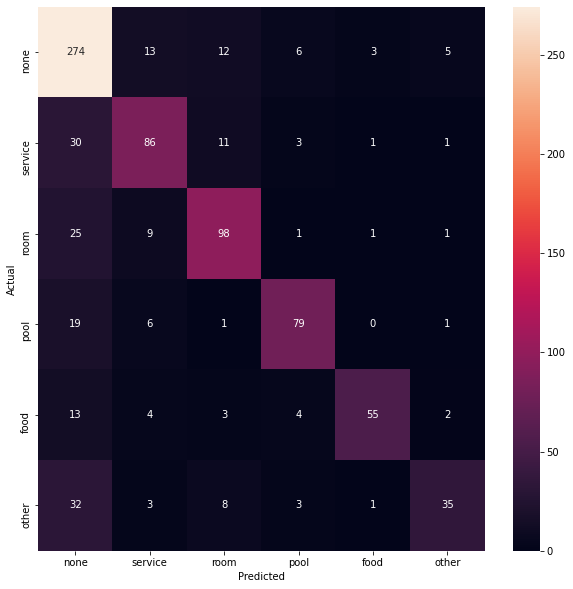

In [110]:
get_gs_info(gs, X_test, y_test)

## SVC

In [67]:
pipe_svc = Pipeline([
    ('vector', TfidfVectorizer(ngram_range=(1,3), stop_words='english')),
    ('svc', SVC(kernel='linear', gamma='auto')),
])

In [116]:
pipe_params_svc = {
    'vector__max_features': [500, 750, 1000],
    'vector__min_df': [4, 5, 6],
    'vector__max_df': [.3, .35, .4],
    'svc__C': [.8, .9, 1.0],
    'svc__degree': [3],
    'svc__gamma': [.0001, .001, .01],
}

In [117]:
gs_svc = GridSearchCV(pipe_svc, 
                  pipe_params_svc,
                  cv=5,
                  n_jobs=-1,
                 )

In [118]:
gs_svc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vector',
                                        TfidfVectorizer(ngram_range=(1, 3),
                                                        stop_words='english')),
                                       ('svc',
                                        SVC(gamma='auto', kernel='linear'))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.8, 0.9, 1.0], 'svc__degree': [3],
                         'svc__gamma': [0.0001, 0.001, 0.01],
                         'vector__max_df': [0.3, 0.35, 0.4],
                         'vector__max_features': [500, 750, 1000],
                         'vector__min_df': [4, 5, 6]})

In [119]:
map_category.keys()

dict_keys(['none', 'service', 'room', 'pool', 'food', 'other'])

Pipeline(steps=[('vector',
                 TfidfVectorizer(max_df=0.3, max_features=750, min_df=5,
                                 ngram_range=(1, 3), stop_words='english')),
                ('svc', SVC(C=0.9, gamma=0.0001, kernel='linear'))])

0.789466466350784

0.7985865724381626

0.7985865724381626

0.7863356809225196

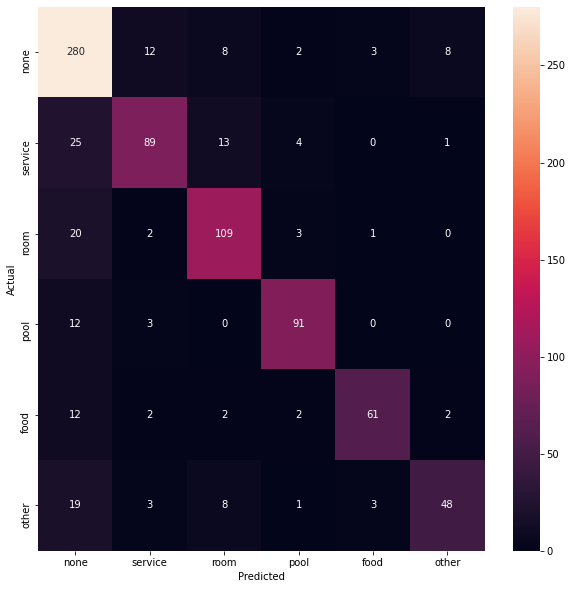

In [120]:
get_gs_info(gs_svc, X_test, y_test)

## Random Forest

In [73]:
pipe_rf = Pipeline([
    ('vector', TfidfVectorizer(ngram_range=(1,3), stop_words='english')),
    ('rf', RandomForestClassifier(class_weight = 'balanced')),
])

In [165]:
pipe_params_rf = {
    'vector__max_features': [1750, 2000, 2250],
    'vector__min_df': [1, 2,3],
    'vector__max_df': [.25, .3, .35],
    'rf__n_estimators': [120, 140, 160],
    'rf__max_depth':[8],
}

In [166]:
gs_rf = GridSearchCV(pipe_rf, 
                  pipe_params_rf,
                  cv=5,
                  n_jobs=-1,
                 )

In [167]:
gs_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vector',
                                        TfidfVectorizer(ngram_range=(1, 3),
                                                        stop_words='english')),
                                       ('rf',
                                        RandomForestClassifier(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [8],
                         'rf__n_estimators': [120, 140, 160],
                         'vector__max_df': [0.25, 0.3, 0.35],
                         'vector__max_features': [1750, 2000, 2250],
                         'vector__min_df': [1, 2, 3]})

Pipeline(steps=[('vector',
                 TfidfVectorizer(max_df=0.35, max_features=2000,
                                 ngram_range=(1, 3), stop_words='english')),
                ('rf',
                 RandomForestClassifier(class_weight='balanced', max_depth=8,
                                        n_estimators=120))])

0.7863292114488231

0.790341578327444

0.790341578327444

0.7791360221401074

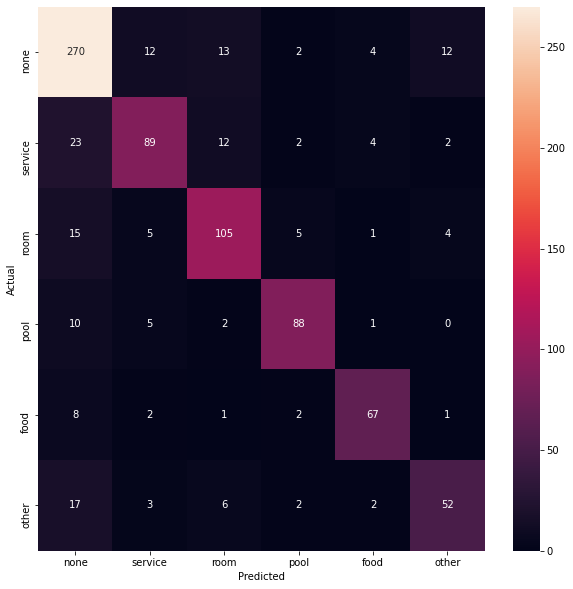

In [168]:
get_gs_info(gs_rf, X_test, y_test)

## Ada Boost

In [78]:
pipe_ada = Pipeline([
    ('vector', TfidfVectorizer(ngram_range=(1,3), stop_words='english')),
    ('ada', AdaBoostClassifier()),
])

In [173]:
pipe_params_ada = {
    'vector__max_features': [2250, 2500, 2750, 3000, 3520],
    'vector__min_df': [1, 2, 3],
    'vector__max_df': [.65, .7, .75],
    'ada__learning_rate': [.7, .8, .9],
    'ada__n_estimators': [80, 90, 100],
    }

In [174]:
gs_ada = GridSearchCV(pipe_ada, 
                  pipe_params_ada,
                  cv=5,
                  n_jobs=-1,
                 )

In [175]:
gs_ada.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vector',
                                        TfidfVectorizer(ngram_range=(1, 3),
                                                        stop_words='english')),
                                       ('ada', AdaBoostClassifier())]),
             n_jobs=-1,
             param_grid={'ada__learning_rate': [0.7, 0.8, 0.9],
                         'ada__n_estimators': [80, 90, 100],
                         'vector__max_df': [0.65, 0.7, 0.75],
                         'vector__max_features': [2250, 2500, 2750],
                         'vector__min_df': [1, 2, 3]})

Pipeline(steps=[('vector',
                 TfidfVectorizer(max_df=0.7, max_features=2750,
                                 ngram_range=(1, 3), stop_words='english')),
                ('ada',
                 AdaBoostClassifier(learning_rate=0.7, n_estimators=100))])

0.7348749951847144

0.7455830388692579

0.7455830388692579

0.6962734223956067

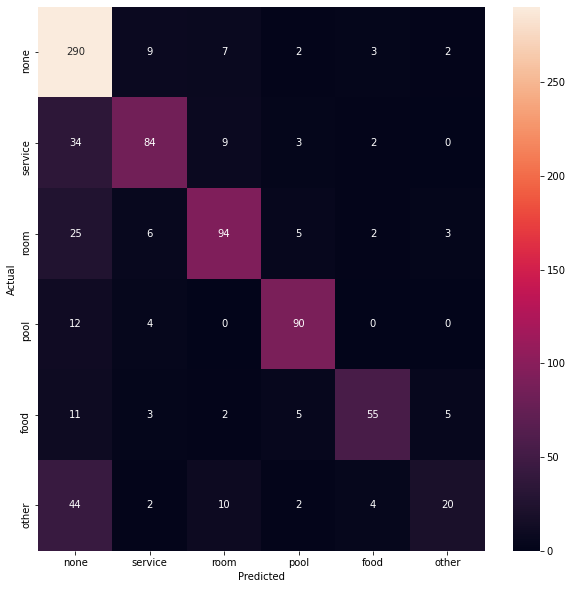

In [176]:
get_gs_info(gs_ada, X_test, y_test)

### Evaluate Misclassified Sentences

In [67]:
df_rf = pd.DataFrame(index=X_test.index, data=X_test)

In [68]:
df_rf['category'] = y_test
df_rf['preds'] = gs_rf.predict(X_test)

In [71]:
df_rf_incorrect = df_rf.loc[df_rf['category'] != df_rf['preds']]

In [73]:
inv_map_category = {v: k for k, v in map_category.items()}

In [74]:
inv_map_category

{0: 'none', 1: 'service', 2: 'room', 3: 'pool', 4: 'food', 5: 'other'}

In [75]:
def reverse_map_categories(category_series):
    return category_series.map(inv_map_category)

In [76]:
df_rf_incorrect

,sent_text_mod,category,preds
276,2 extra large single bed massive shower immacu...,2,0
2992,sleep low floor talk guest know noise serious ...,2,0
2136,day birthday decide go swim early morning ques...,3,2
228,clean safe boot,0,2
1997,little chilly bring robe water perfect,3,0
...,...,...,...
3020,view incredible pool amazing staff helpful att...,3,1
593,architecture room view staff incredible,1,2
1471,special mention leonard concirerge desk,1,0
1533,stay 2 night hotel architectural marvel level ...,1,0


In [77]:
df_rf_incorrect['category'] = reverse_map_categories(df_rf_incorrect['category'])
df_rf_incorrect['preds'] = reverse_map_categories(df_rf_incorrect['preds'])

<ipython-input-77-488de1a656e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rf_incorrect['category'] = reverse_map_categories(df_rf_incorrect['category'])
<ipython-input-77-488de1a656e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rf_incorrect['preds'] = reverse_map_categories(df_rf_incorrect['preds'])


In [78]:
df_rf_incorrect

,sent_text_mod,category,preds
276,2 extra large single bed massive shower immacu...,room,none
2992,sleep low floor talk guest know noise serious ...,room,none
2136,day birthday decide go swim early morning ques...,pool,room
228,clean safe boot,none,room
1997,little chilly bring robe water perfect,pool,none
...,...,...,...
3020,view incredible pool amazing staff helpful att...,pool,service
593,architecture room view staff incredible,service,room
1471,special mention leonard concirerge desk,service,none
1533,stay 2 night hotel architectural marvel level ...,service,none


In [79]:
df_rf_incorrect.to_csv('../stage_1_eval/gs_rf_incorrect.csv')

## Sentiment Analysis

In [178]:
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

In [179]:
X_sent = df['sent_text']
y_sent = df['sentiment']
sid = SentimentIntensityAnalyzer()

In [182]:
X_sent

0       I was able to have a swim and take the photo b...
1       The lobby was super busy and I found that a li...
2        But once I got to my room, it was very peaceful.
3       I'm glad I stayed here but not sure that I wou...
4       The hotel is amazingly stunning, from when you...
                              ...                        
3390    It's useful to say that you pay only for the r...
3391    I've tried all the restaurants and i can say t...
3392          Nightclub super cool for your crazy nights!
3393                                        Why go there?
3394    The place to add to your "check-list" as you v...
Name: sent_text, Length: 3395, dtype: object

In [184]:
for row in X_sent.iteritems():
    print(row[1])

I was able to have a swim and take the photo but didn't want to stay because of the crowds.
The lobby was super busy and I found that a little disconcerting and impersonal.
But once I got to my room, it was very peaceful.
I'm glad I stayed here but not sure that I would again.
The hotel is amazingly stunning, from when you first step out of the taxi to getting to your room.
This is a must stay even for most one night to use the infinity pool.
We had a view of the gardens by the bay and when it was lit up at night it was purely magical.
Marina Bay Sands totally is the best part of Singapore every beautiful part is in there .
The hotel the science museum , garden by the bay .
I think if you want to visit Singapore you should totally stay at least one night there .
The infinity pool is fantastic you can view all the city from there .
The hotel luxurious but so many people normal I think .
I have been wanting to come to Singapore for years, so i used my 40th Wedding Anniversary as the reas

For many itâ€™s also a tourist spot even if they are not the hotel guest.
For me living in this property was ticking off the buckle list.
The hotel reception was very inviting and they were quick to check us in in spite of a long queue, the staff is really well trained to cater to high volumes.
A hotel guest is having a check-in zone depending on the room category, for us it was Tower 3.
->Room: We opted for a Premier King Sky view.
The room was very well laid out with all things placed to comfort.
The room was really very huge.
In spite of a normal room category, the size was like a Junior Suite Room.
The view from room window
We enjoyed our overnight stay in this hotel.
We were even upgraded to 26th flr.
Mr. Lee Yew Kee the Captain of Transportation is very helpful in arranging for our itinerary in the remaining hours of our stay in Singapore.
He has good practical suggestions.
We will soon stay here in our next visit.
This was the highlight of our trip to Singapore in the Fall of 20

In [195]:
for index, row in df.iterrows():
    ss = sid.polarity_scores(row['sent_text'])
#     df_pp.loc[pp_index, 'vader_neg'] = ss['neg']
#     df_pp.loc[pp_index, 'vader_neu'] = ss['neu']
#     df_pp.loc[pp_index, 'vader_pos'] = ss['pos']
#     df_pp.loc[pp_index, 'vader_comp'] = ss['compound']

    # overall sentiment started as vader_comp rounded up or down
    if ss['compound'] > 0.1:
        df.loc[index, 'sentiment_pred'] = 1
    elif ss['compound'] == 0 :
        df.loc[index, 'sentiment_pred'] = 0
    elif ss['compound'] < 0.1:
        df.loc[index, 'sentiment_pred'] = -1
        
#     if row['sentiment'] == row['sentiment_pred']:
#         matches += 1
# sentiment_score = matches/len(df)  
# print(f'Sentiment Score: {sentiment_score}')

In [196]:
matches = 0
for index, row in df.iterrows():
    if row['sentiment'] == row['sentiment_pred']:
        matches += 1
sentiment_score = matches/len(df)  
print(f'Sentiment Score: {sentiment_score}')

Sentiment Score: 0.7578792341678939


Can we adjust VADER to predict the scores more accurately? Let's take a look at what mistakes are common and if we may fix them through a rules-matching approach

In [192]:
df.loc[(df['sentiment'] != df['sentiment_pred']), ['sent_text', 'sentiment', 'sentiment_pred']].to_csv('../stage_1_eval/df_sentiment.csv')

### Using TF-IDF and Classifiers

In [215]:
X = df['sent_text_mod']
y = df['sentiment']

In [216]:
df['sentiment'].value_counts()

 1.0    1867
 0.0    1123
-1.0     405
Name: sentiment, dtype: int64

In [217]:
df.loc[df['sentiment'] == 6.0, 'sentiment'] = 1.0

In [218]:
X_train_sent, X_test_sent, y_train_sent, y_test_sent = train_test_split(X, y,
                                                   test_size=.25,
                                                    random_state = 42,
                                                   stratify=y)

In [224]:
pipe_params_rf_sent = {
    'vector__max_features': [2250, 2500, 2750],
    'vector__min_df': [1, 2, 3],
    'vector__max_df': [.25, .3, .35],
    'rf__n_estimators': [120, 140, 160],
    'rf__max_depth':[7],
}

In [225]:
gs_rf_sent = GridSearchCV(pipe_rf, 
                  pipe_params_rf_sent,
                  cv=5,
                  n_jobs=-1,
                 )

In [226]:
gs_rf_sent.fit(X_train_sent, y_train_sent)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vector',
                                        TfidfVectorizer(ngram_range=(1, 3),
                                                        stop_words='english')),
                                       ('rf',
                                        RandomForestClassifier(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [7],
                         'rf__n_estimators': [120, 140, 160],
                         'vector__max_df': [0.25, 0.3, 0.35],
                         'vector__max_features': [2250, 2500, 2750],
                         'vector__min_df': [1, 2, 3]})

Pipeline(steps=[('vector',
                 TfidfVectorizer(max_df=0.35, max_features=2500,
                                 ngram_range=(1, 3), stop_words='english')),
                ('rf',
                 RandomForestClassifier(class_weight='balanced', max_depth=7,
                                        n_estimators=120))])

0.6076135444354559

0.5936395759717314

0.5936395759717314

0.5451963478415034

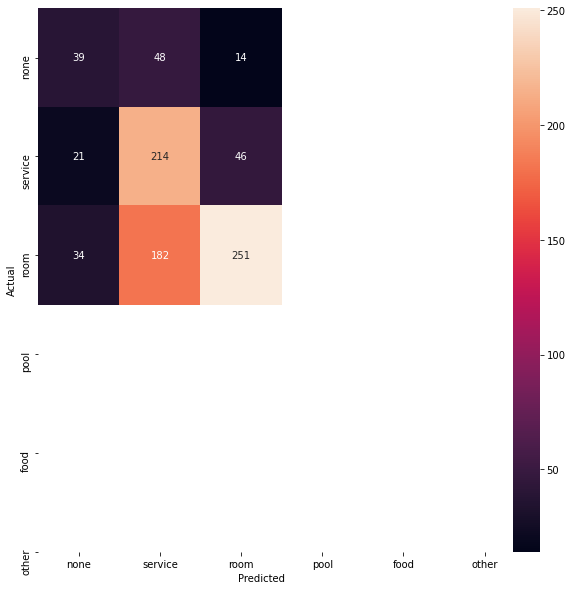

In [229]:
get_gs_info(gs_rf_sent, X_test_sent, y_test_sent)